# Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# Basic Libraries
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/ADDDROPGANG/train.json')

df

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [ ]:
country = df['cuisine']
country.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

# Plot of the count of cuisine from each country

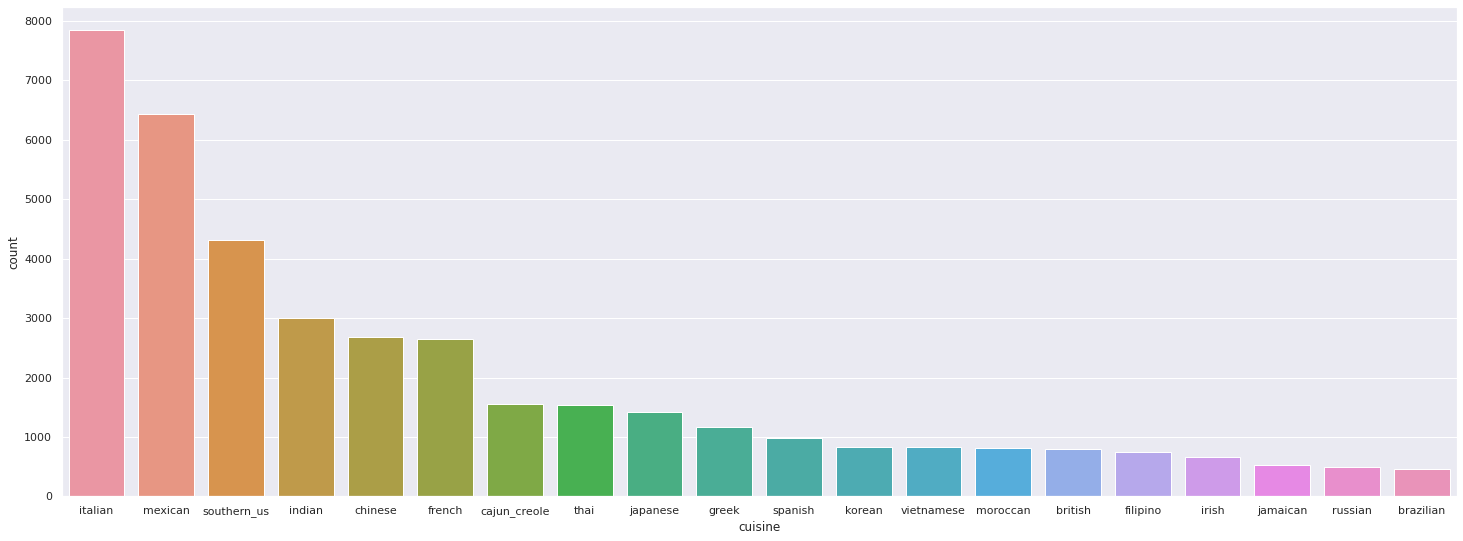

In [ ]:
a4_dims = (25, 9)
fig, ax = plt.subplots(figsize=a4_dims)

sb.countplot(ax=ax,x = 'cuisine',data = df,order = country.value_counts().index)
plt.show()

# Top 25 Most Used Ingredients(All Cuisine)

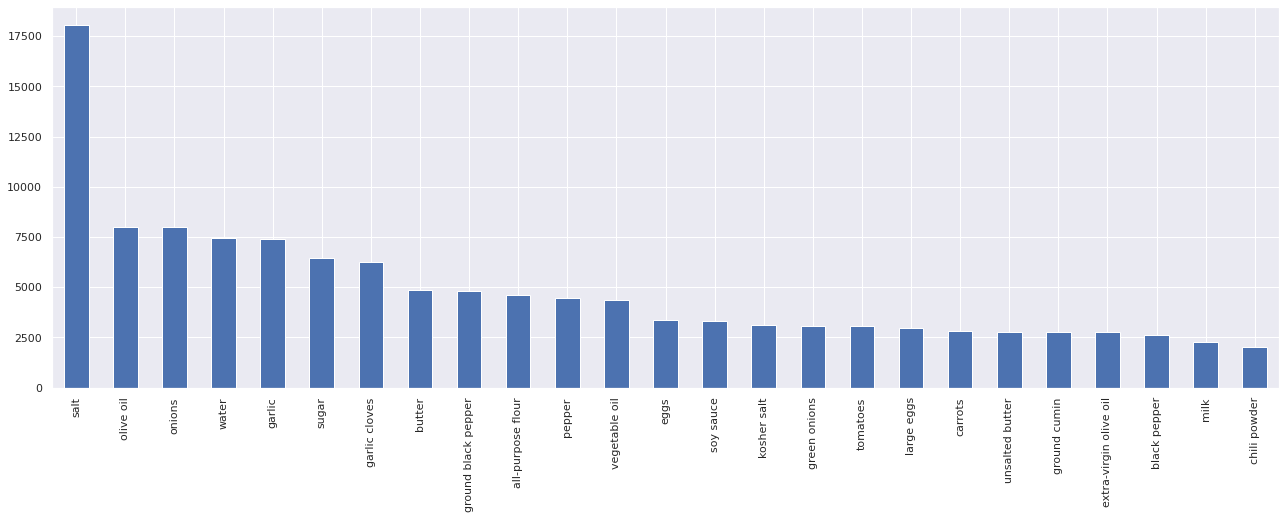

In [ ]:
fig, ax = plt.subplots(figsize=(22,7))
extensive_ing_list = []
for x in df['ingredients']:
    for y in x:
        extensive_ing_list.append(y)
        
extensive_ing_list = pd.Series(extensive_ing_list)
extensive_ing_list.value_counts().sort_values(ascending=False).head(25).plot.bar(ax = ax)

plt.show()

# Placing all the ingredients from the same cuisine into their respective cuisine

In [ ]:
all_cus = dict()
for cs in country.unique():
    i = []
    for ing_list in df[df['cuisine']==cs]['ingredients']:
        for ing in ing_list:
            i.append(ing)
    all_cus[cs] = i

all_cus.keys()


dict_keys(['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian'])

# 20 most used ingredients for each cuisine

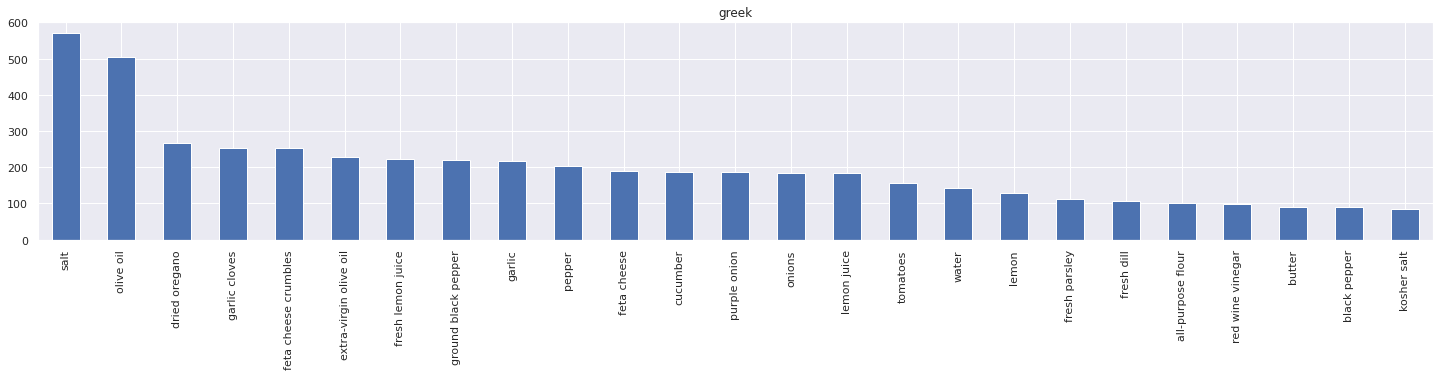

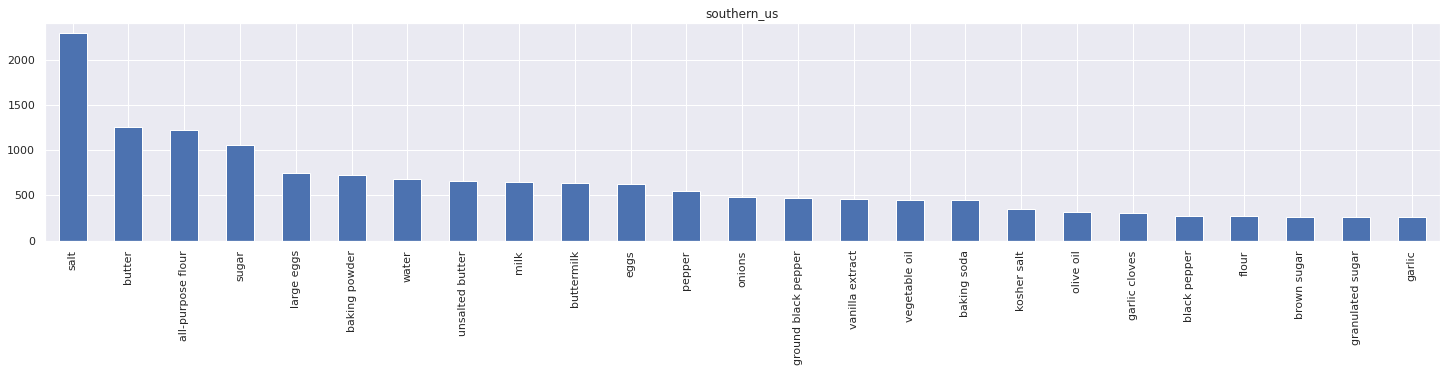

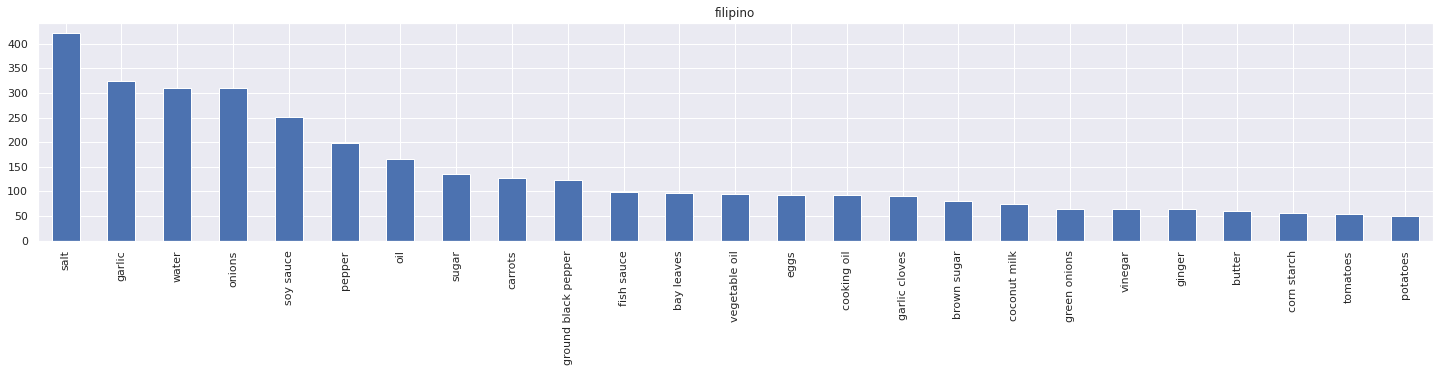

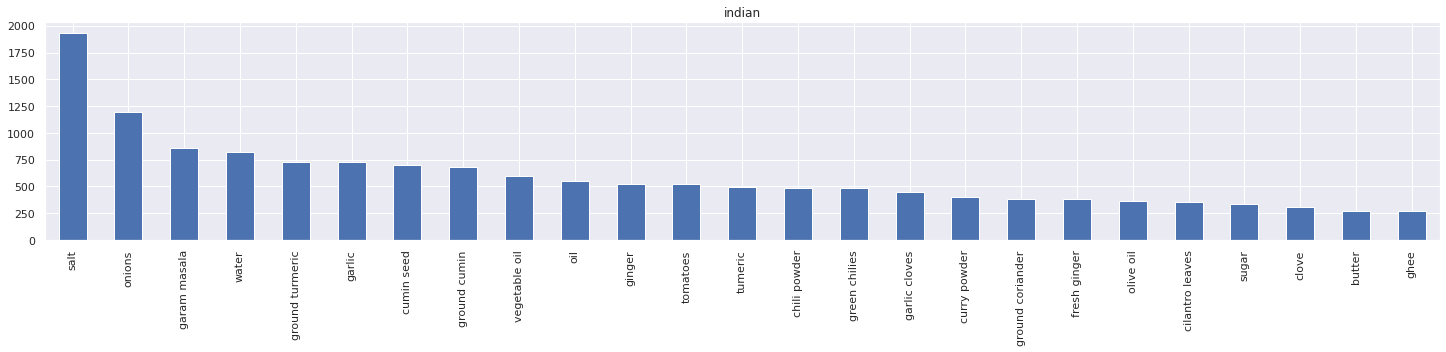

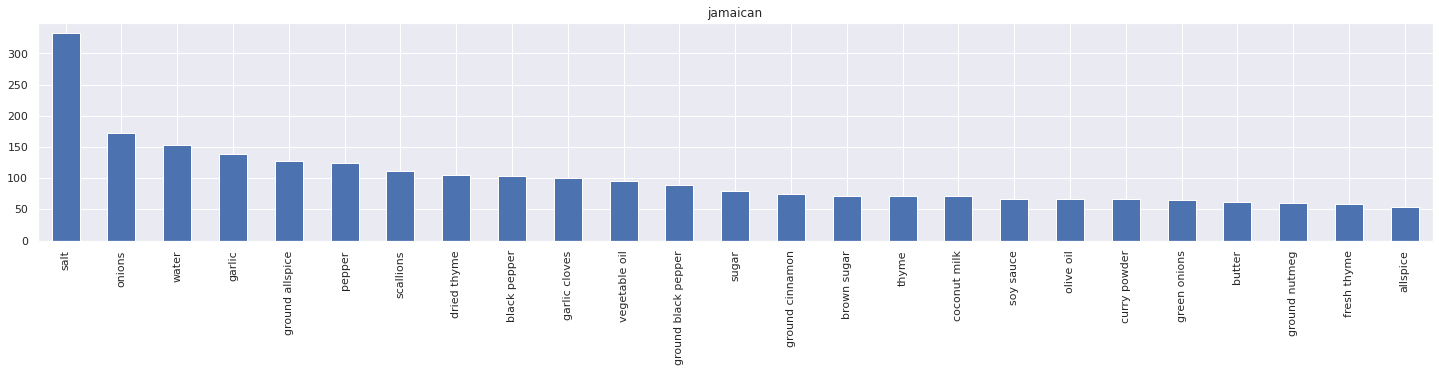

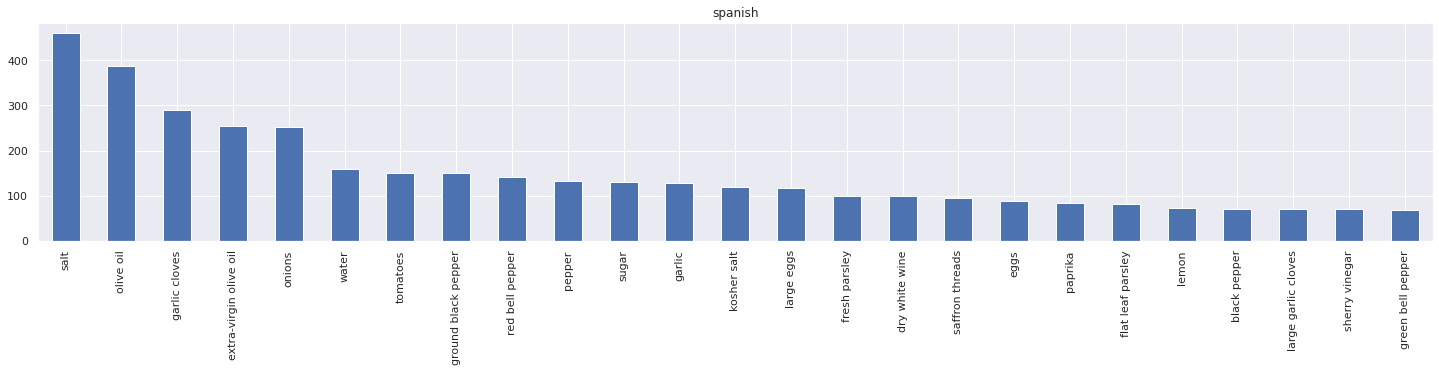

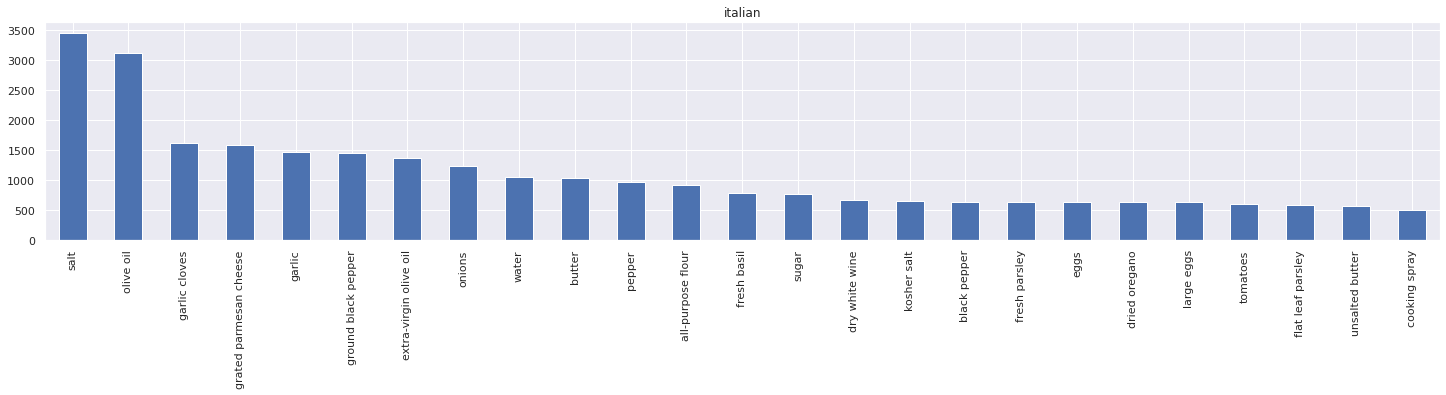

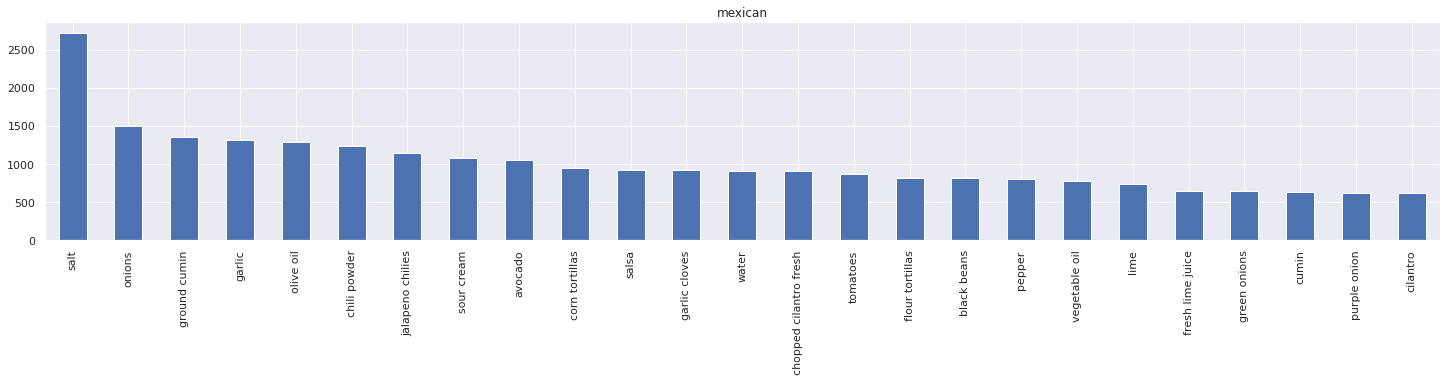

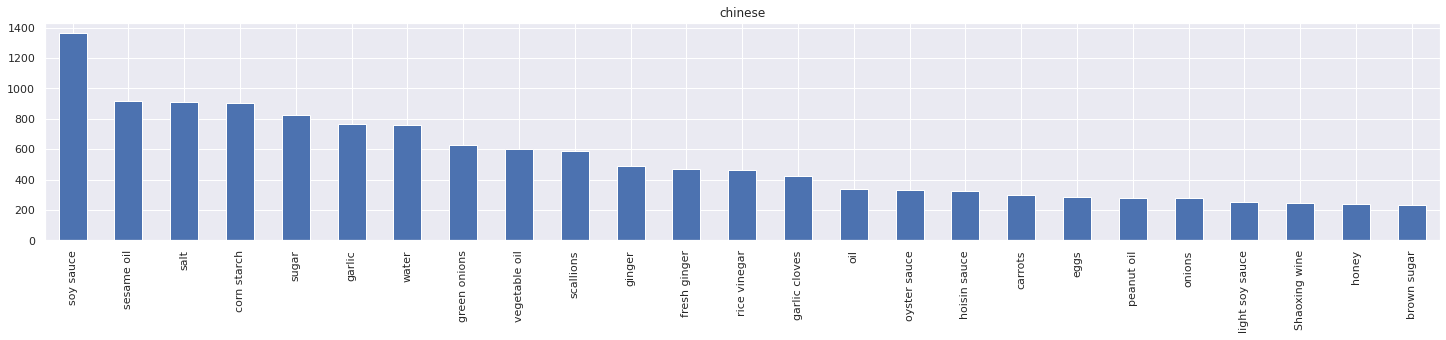

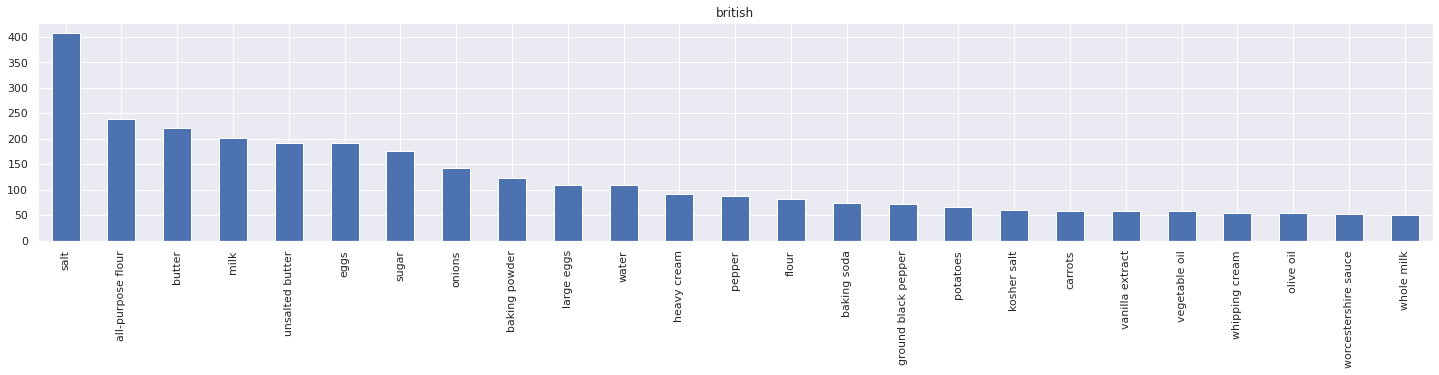

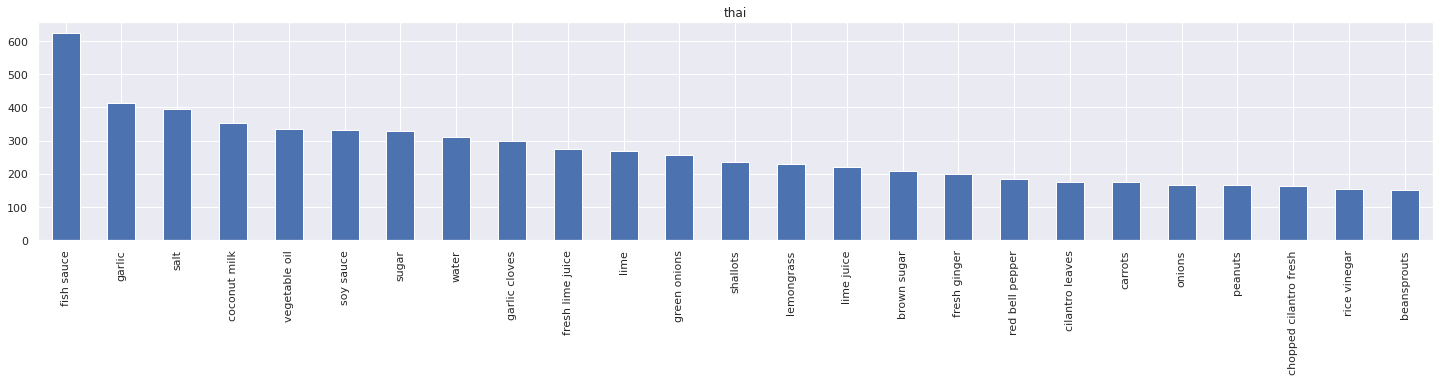

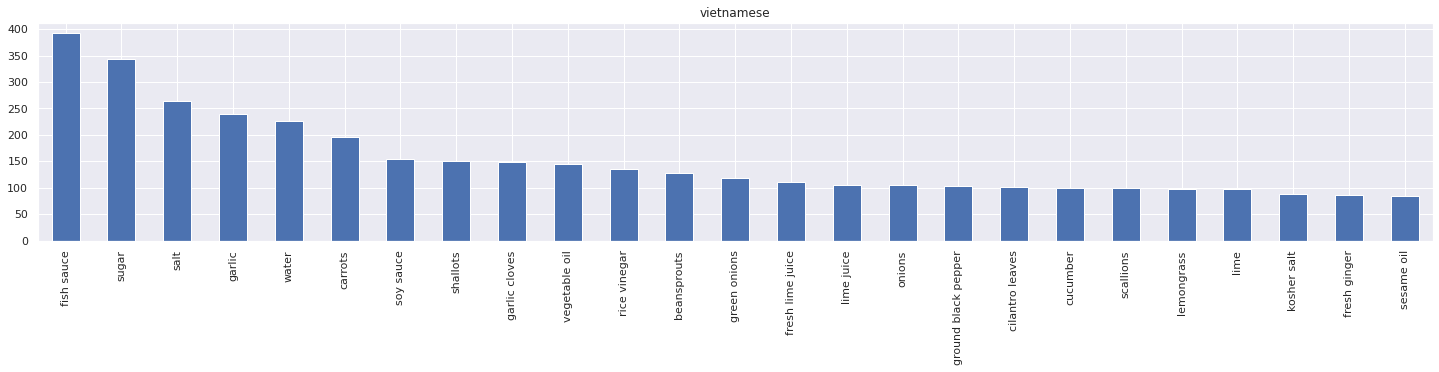

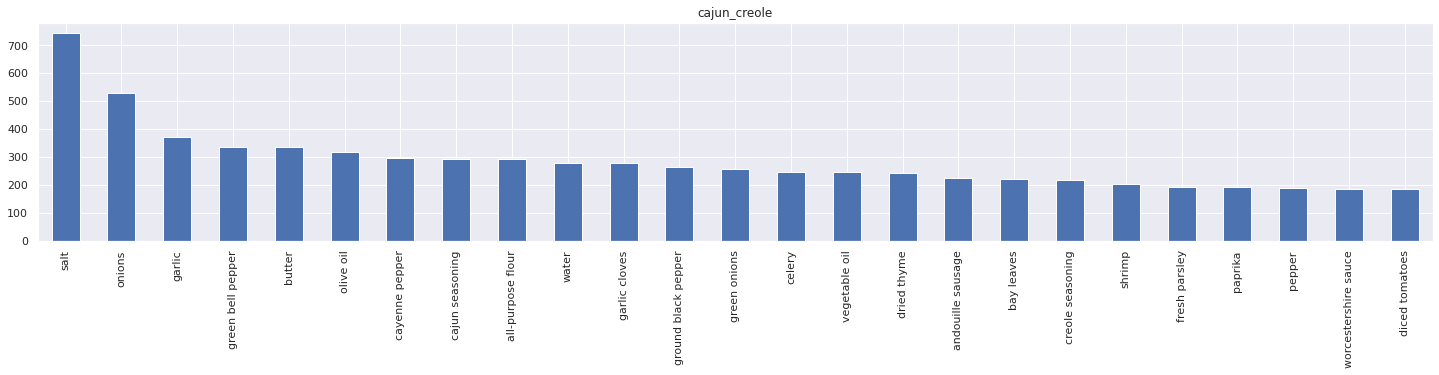

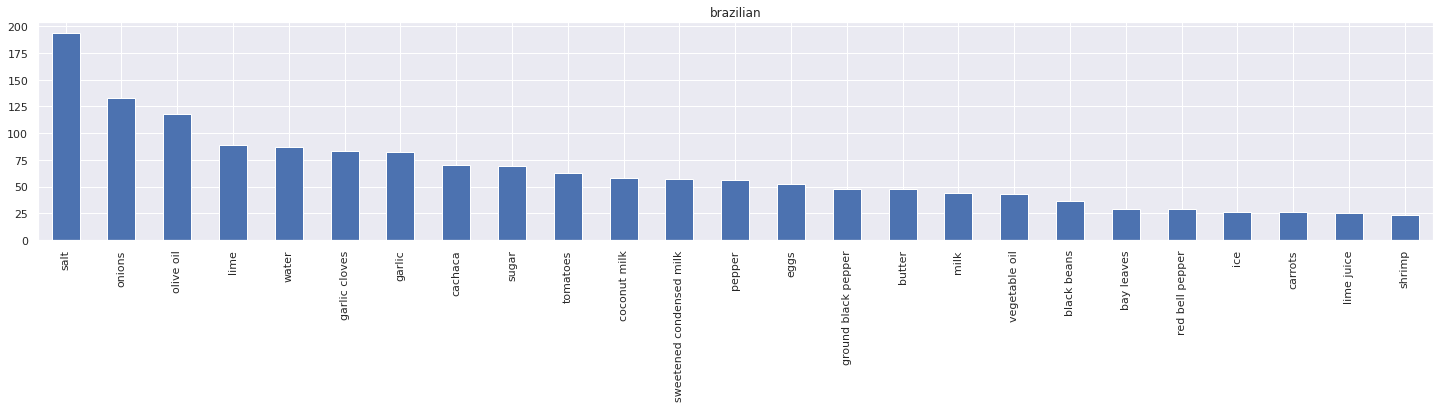

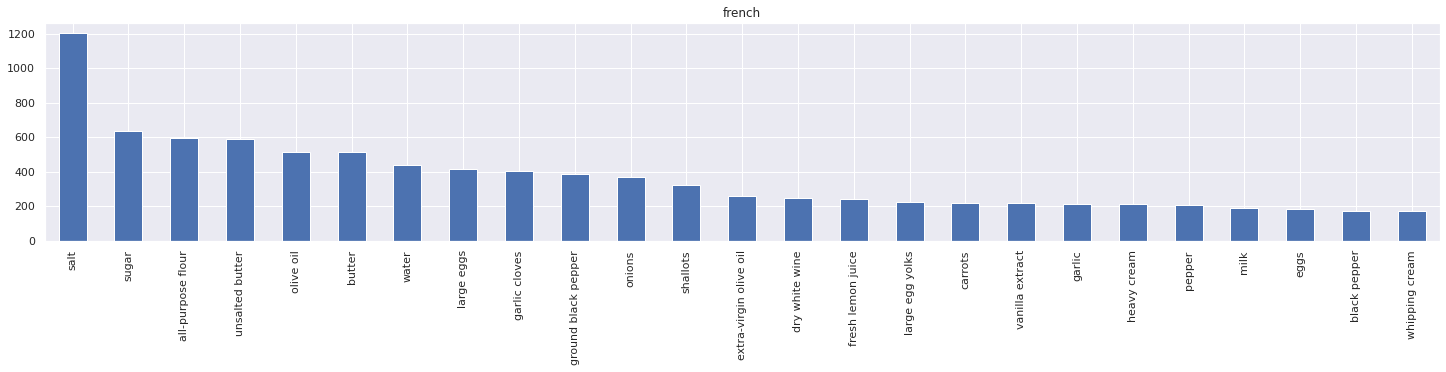

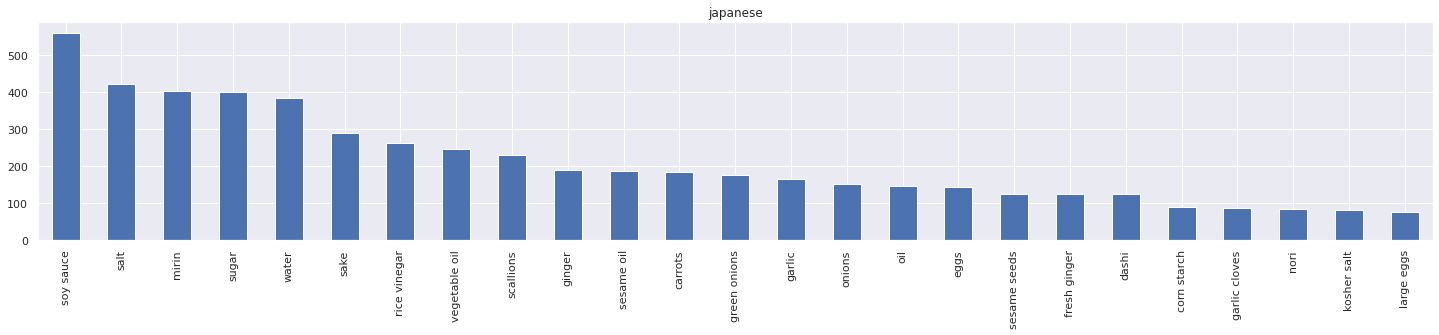

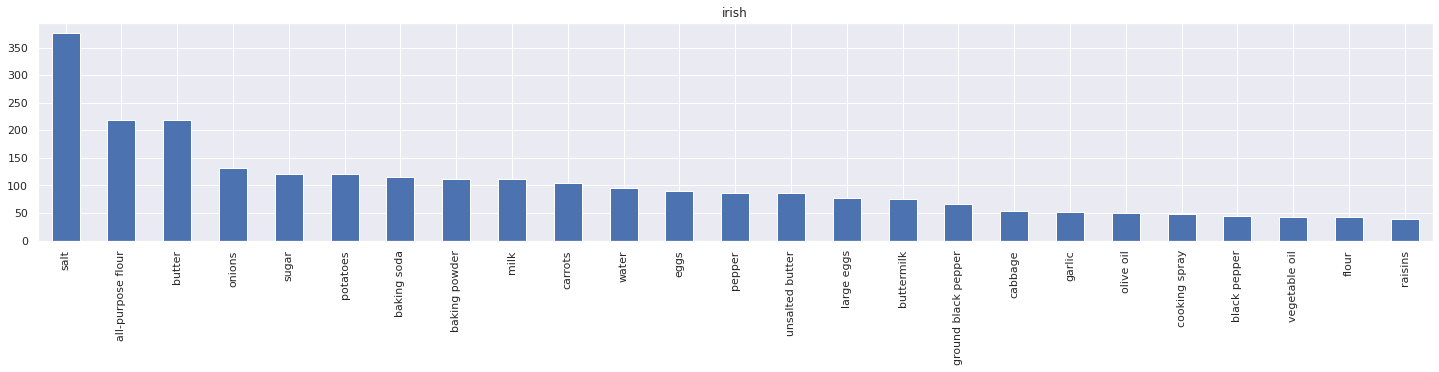

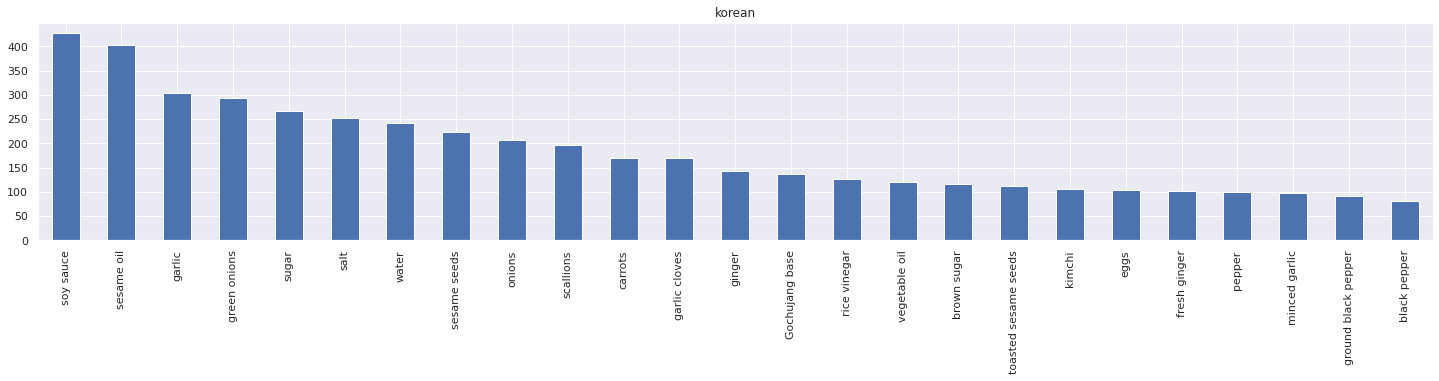

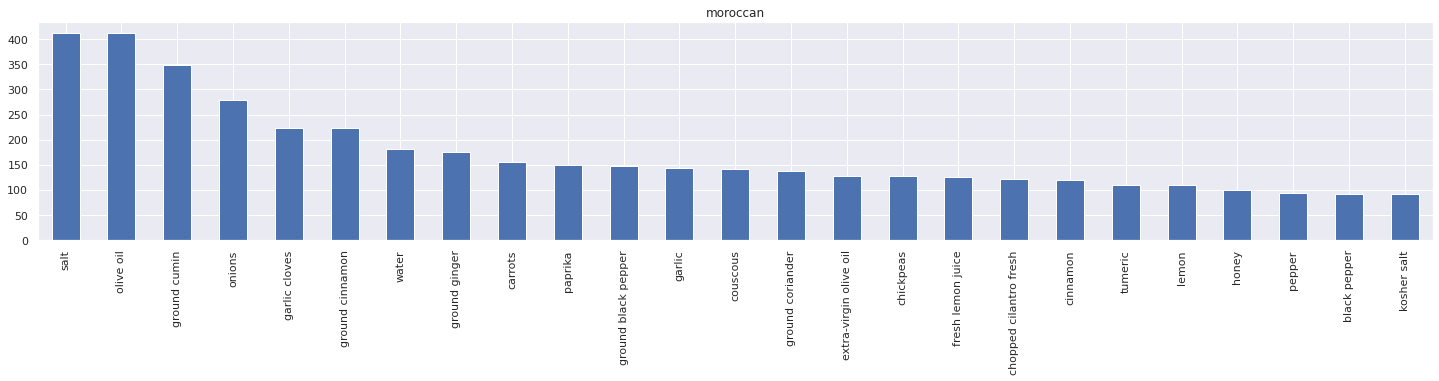

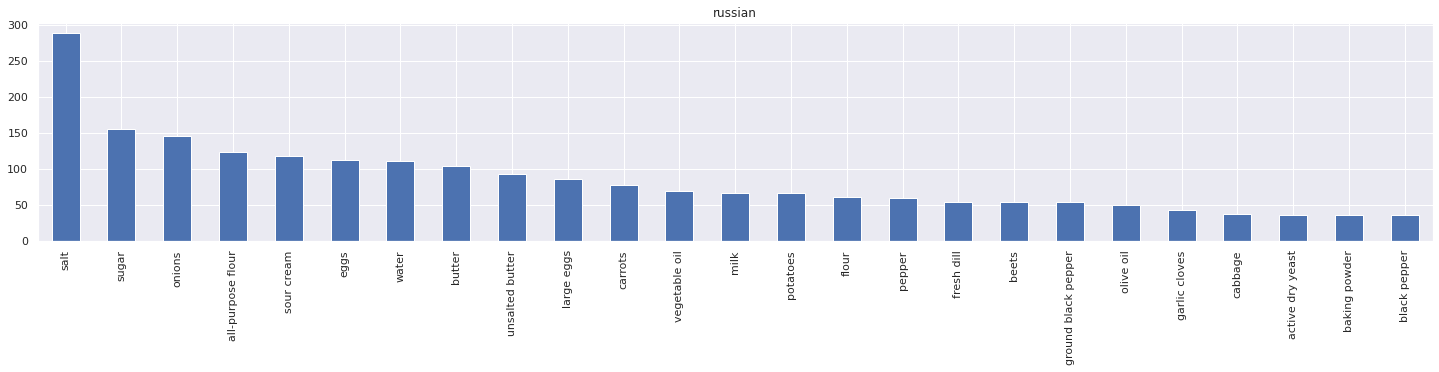

In [ ]:
for countries in all_cus.keys():
    fig, ax = plt.subplots(figsize=(25,4))
    pd.Series(all_cus[countries]).value_counts().head(25).plot.bar(ax=ax, title=countries)
plt.show()

# Filtering the ingredients

Because some ingredients are brand names, we remove them.
Removing units
lemmatization(To turn verbs/past tense into nouns)

In [ ]:
import unicodedata
import re

ingredient_temp = {}
for i in df.iterrows():
    ingredient_temp.update({x: unicodedata.normalize('NFD', x).encode('ascii', 'ignore').decode("utf-8").lower() 
                           for x in i[1]['ingredients']})

def norm_special(df, keepRegion): #function to make unique ingredients normal  
    ingredient_temp['Johnsonville Andouille Dinner Sausage'] = 'sausage'
    ingredient_temp['Oscar Mayer Deli Fresh Smoked Ham'] = 'ham'
    ingredient_temp['Mexican cheese blend'] = 'mexican cheese'
    ingredient_temp['grated GruyÃ¨re cheese'] = 'gruyere cheese'
    ingredient_temp['shredded Monterey Jack cheese'] = 'monterey jack cheese'
    ingredient_temp['Old El Paso Flour Tortillas'] = 'tortilla'
    ingredient_temp['Philadelphia Cream Cheese'] = 'cream cheese'
    ingredient_temp['Franks Hot Sauce'] = 'hot sauce'
    ingredient_temp['BertolliÂ® Classico Olive Oil'] = 'olive oil'
    ingredient_temp['Old El Pasoâ„¢ mild red enchilada sauce'] = 'red enchilada sauce'
    ingredient_temp['Pillsburyâ„¢ Refrigerated Crescent Dinner Rolls'] = 'crescent'
    ingredient_temp['SargentoÂ® Traditional Cut Shredded Mozzarella Cheese'] = 'mozzarella cheese'
    ingredient_temp['McCormick Parsley Flakes'] = 'parsley flake'
    ingredient_temp['Crystal Farms Butter'] = 'butter'
    ingredient_temp['Crystal Farms Shredded Gouda Cheese'] = 'gouda cheese'
    ingredient_temp['Oscar Mayer Bacon'] = 'bacon'
    ingredient_temp['Campbell\'s Condensed Tomato Soup'] = 'tomato soup'
    ingredient_temp['Hellmann"s Light Mayonnaise'] = 'mayonnaise'
    ingredient_temp['Kraft Grated Parmesan Cheese'] = 'parmesan cheese'
    ingredient_temp['hatch green chiles'] = 'green chili'
    ingredient_temp['Jell-O Gelatin Dessert'] = 'gelatin'
    ingredient_temp['Hurst Family Harvest Chipotle Lime Black Bean Soup mix'] = 'chipotle lime black bean soup'
    ingredient_temp["Campbell's Condensed Cream of Chicken Soup"] = "cream of chicken soup"
    ingredient_temp['Pace Picante Sauce'] = 'picante sauce'
    ingredient_temp['Crystal Hot Sauce'] = 'hot sauce'
    ingredient_temp['Chinese egg noodles'] = 'egg noodle'
    ingredient_temp['Country CrockÂ® Spread'] = 'butter spread'
    ingredient_temp['Progresso Black Beans'] = 'black bean'
    ingredient_temp['Old El Pasoâ„¢ chopped green chiles'] = 'green chili'
    ingredient_temp['Wish-Bone Italian Dressing'] = 'italian dressing'
    ingredient_temp['Splenda Brown Sugar Blend'] = 'brown sugar'
    ingredient_temp['KnorrÂ® Beef Bouillon'] = 'beef bouillon'
    ingredient_temp['Neapolitan ice cream'] = 'ice cream'
    ingredient_temp["I Can't Believe It's Not Butter!Â® Spread"] = 'margarine'
    ingredient_temp['St Germain Liqueur'] = 'elderflower liqeur'
    ingredient_temp['Zatarainâ€™s Jambalaya Mix'] = 'jambalaya mix'
    ingredient_temp['Argo Corn Starch'] = 'corn starch'
    ingredient_temp['Old El Pasoâ„¢ taco seasoning mix'] = 'seasoning'
    ingredient_temp["Campbell's Condensed Cheddar Cheese Soup"] = 'cheddar soup'
    ingredient_temp['Pace Chunky Salsa'] = 'salsa'
    ingredient_temp["Hellmann'sÂ® Real Mayonnaise"] = 'mayonnaise'
    ingredient_temp['Skippy Creamy Peanut Butter'] = 'peanut butter'
    ingredient_temp['BACARDIÂ® Mixers Margarita Mix'] = 'margarita mix'
    ingredient_temp["Uncle Ben's Original Converted Brand rice"] = 'rice'
    ingredient_temp['Bragg Liquid Aminos'] = 'liquid aminos'
    ingredient_temp['KNUDSEN 2% Milkfat Low Fat Cottage Cheese'] = 'cottage cheese'
    ingredient_temp['KRAFT Reduced Fat Shredded Mozzarella Cheese'] = 'mozzarella cheese'
    ingredient_temp['Baileys Irish Cream Liqueur'] = 'irish cream liqeur'
    ingredient_temp['Kerrygold Pure Irish Butter'] = 'butter'
    ingredient_temp['BertolliÂ® Alfredo Sauce'] = 'vanilla extract'
    ingredient_temp['McCormickÂ® Pure Vanilla Extract'] = 'vanilla extract'
    ingredient_temp['Kraft Sun Dried Tomato Vinaigrette'] = 'vinaigrette'
    ingredient_temp['Italian turkey sausage'] = 'sausage'
    ingredient_temp['Hidden ValleyÂ® Original RanchÂ® Dips Mix'] = 'ranch dip'
    ingredient_temp['Domino Light Brown Sugar'] = 'brown sugar'
    ingredient_temp['Best FoodsÂ® Real Mayonnaise'] = 'mayonnaise'
    ingredient_temp['Red GoldÂ® diced tomatoes'] = 'tomato'
    ingredient_temp['Gourmet Garden garlic paste'] = 'garlic paste'
    ingredient_temp['Gourmet Garden Oregano'] = 'oregano'
    ingredient_temp['Pompeian Canola Oil and Extra Virgin Olive Oil'] = 'olive oil'
    ingredient_temp['Swanson Chicken Broth'] = 'chicken broth'
    ingredient_temp['McCormick Ground Ginger'] = 'ginger'
    ingredient_temp['Philadelphia Cooking Creme'] = 'cream'
    ingredient_temp['Old El Paso Taco Seasoning Mix'] = 'seasoning'
    ingredient_temp['Crystal FarmsÂ® Shredded Cheddar Cheese'] = 'cheddar cheese'
    ingredient_temp["JOHNSONVILLEÂ® Hot 'N Spicy Brats"] = 'sausage'
    ingredient_temp['Barilla Oven-Ready Lasagne'] = 'lasagne'
    ingredient_temp['Betty Crockerâ„¢ oatmeal cookie mix'] = 'oatmeal cookie mix'
    ingredient_temp['YoplaitÂ® Greek 100 blackberry pie yogurt'] = 'yoghurt'
    ingredient_temp['KRAFT Mexican Style Finely Shredded Four Cheese'] = 'cheese'
    ingredient_temp['whole grain English muffins'] = 'muffin'
    ingredient_temp['Hidden ValleyÂ® Original RanchÂ® Dressing'] = 'ranch dressing'
    ingredient_temp["I Can't Believe It's Not Butter!Â® All Purpose Sticks"] = "margarine"
    ingredient_temp['Adobo All Purpose Seasoning'] = 'seasoning'
    ingredient_temp["Campbell's Condensed Cream of Mushroom up"] = "cream of mushroom"
    ingredient_temp['McCormick Poppy Seed'] = 'poppy seed'
    ingredient_temp['McCormick Ground White Pepper'] = 'pepper'
    ingredient_temp['Hidden ValleyÂ® Original RanchÂ® Spicy Ranch Dressing'] = 'salad dressing'
    ingredient_temp['CURRY GUY Smoked Spicy Salt'] = 'salt'
    ingredient_temp['Johnsonville Smoked Sausage'] = 'sausage'
    ingredient_temp['Knudsen Light Sour Cream'] = 'sour cream'
    ingredient_temp['Alaskan king crab legs'] = 'alaskan king crab'
    ingredient_temp['Estancia Pinot Noir'] = 'pinot noir'
    ingredient_temp['Massaman curry paste'] = 'curry paste'
    ingredient_temp['aged Manchego cheese'] = 'manchego cheese'
    ingredient_temp['Heinz Chili Sauce'] = 'chili sauce'
    ingredient_temp['Lea & Perrins Worcestershire Sauce'] = 'worcestershire sauce'
    ingredient_temp['Hidden ValleyÂ® Original Ranch SaladÂ® Dressing & Seasoning Mix'] = 'salad dressing'
    ingredient_temp['Conimex Wok Olie'] = 'oil'
    ingredient_temp['Conimex Woksaus Specials Vietnamese Gember Knoflook'] = 'sauce'
    ingredient_temp['Bisquick Baking Mix'] = 'baking mix'
    ingredient_temp["Old El Pasoâ„¢ Thick 'n Chunky salsa"] = "salsa"
    ingredient_temp['Velveeta Cheese Spread'] = 'cheese spread'
    ingredient_temp['DeLallo Extra Virgin Olive Oil'] = 'olive oil'
    ingredient_temp['Johnsonville Hot & Spicy Breakfast Links'] = 'sausage'
    ingredient_temp["Best Food's Mayonnaise with Lime Juice"] = "mayonnaise"
    ingredient_temp['Godiva Chocolate Liqueur'] = 'chocolate liqueur'
    ingredient_temp['KnorrÂ® Pasta Sidesâ„¢ - Alfredo'] = 'alfredo sauce'
    ingredient_temp['Johnsonville Andouille Fully Cooked Sausage'] = 'sausage'
    ingredient_temp['Klondike Rose red skin potato'] = 'potato'
    ingredient_temp['Herdez Salsa Verde'] = 'salsa'
    ingredient_temp['Herdez Salsa Casera'] = 'salsa'
    ingredient_temp['Knorr Chicken Stock Pots'] = 'chicken stock'
    ingredient_temp['Swanson Vegetable Broth'] = 'vegetable broth'
    ingredient_temp['Robert Mondavi Fume Blanc'] = 'fume blanc'
    ingredient_temp['Land O LakesÂ® Butter'] = 'butter'
    ingredient_temp['Cavenders Greek Seasoning'] = 'greek seasoning'
    ingredient_temp['Meyer lemon juice'] = 'lemon juice'
    ingredient_temp['Ortega Tostada Shells'] = 'tortilla'
    ingredient_temp['KnorrÂ® Fiesta Sides Spanish Rice'] = 'rice'
    ingredient_temp['Mizkan Oigatsuo Tsuyu Soup Base'] = 'soup base'
    ingredient_temp['Elmlea Single Light'] = 'cream'
    ingredient_temp['Nestle Table Cream'] = 'table cream'
    ingredient_temp['Progressoâ„¢ Chicken Broth'] = 'chicken broth'
    ingredient_temp['Mazola Corn Oil'] = 'corn oil'
    ingredient_temp['BertolliÂ® Arrabbiata Sauce'] = 'arrabbiata sauce'
    ingredient_temp['Old El Paso Enchilada Sauce'] = 'enchilada sauce'
    ingredient_temp['Philadelphia Light Cream Cheese'] = 'cream cheese'
    ingredient_temp['San Marzano Diced Tomatoes'] = 'tomatoes'
    ingredient_temp['Bertolli Garlic Alfredo Sauce'] = 'alfredo sauce'
    ingredient_temp['Daisy Sour Cream'] = 'sour cream'
    ingredient_temp['Martha White Cornbread Mix'] = 'cornbread mix'
    ingredient_temp['Southern Comfort Liqueur'] = 'liqueur'
    ingredient_temp['Crispy Rice Cereal'] = 'cereal'
    ingredient_temp['Kraft Miracle Whip Dressing'] = 'salad dressing'
    ingredient_temp['Tyson Crispy Chicken Strips'] = 'chicken'
    ingredient_temp['Tapatio Hot Sauce'] = 'hot sauce'
    ingredient_temp['Knorr Chicken Flavor Bouillon'] = 'chicken flavoring'
    ingredient_temp['Meyer lemon peel'] = 'lemon peel'
    ingredient_temp["BREAKSTONE'S Sour Cream"] = "sour cream"
    ingredient_temp['Mizkan Rice Vinegar'] = 'rice vinegar'
    ingredient_temp['Mission Yellow Corn Tortillas'] = 'tortilla'
    ingredient_temp['pitted Medjool dates'] = 'medjool date'
    ingredient_temp['San Marzano Crushed Tomatoes'] = 'tomato'
    ingredient_temp['Saffron Road Vegetable Broth'] = 'vegetable broth'
    ingredient_temp['Kikkoman Soy Sauce'] = 'soy sauce'
    ingredient_temp['Jameson Irish Whiskey'] = 'whiskey'
    ingredient_temp['Velveeta Queso Blanco'] = 'white cheese dip'
    ingredient_temp['KnorrÂ® Vegetable recipe mix'] = 'vegetable mix'
    ingredient_temp['Spice Islands Bay Leaves'] = 'bay leaves'
    ingredient_temp['MazolaÂ® Chicken Flavor Bouillon Powder'] = 'chicken flavoring'
    ingredient_temp['Spice Islands Oregano'] = 'oregano'
    ingredient_temp['Japanese mountain yam'] = 'yam'
    ingredient_temp['KRAFT Shredded Pepper Jack Cheese with a TOUCH OF PHILADELPHIA'] = 'pepper jack cheese'
    ingredient_temp['Heinz Tomato Ketchup'] = 'tomato ketchup'
    ingredient_temp['Taco Bell Taco Seasoning Mix'] = 'seasoning'
    ingredient_temp['Pam No-Stick Cooking Spray'] = 'cooking spray'
    ingredient_temp['Jimmy Dean Pork Sausage'] = 'sausage'
    ingredient_temp['LiptonÂ® Recipe SecretsÂ® Onion Soup Mix'] = 'onion soup mix'
    ingredient_temp['sparkling rosÃ© wine'] = 'rose wine'
    ingredient_temp['Kraft Sharp Cheddar Cheese'] = 'cheddar cheese'
    ingredient_temp['Cholula Hot Sauce'] = 'hot sauce'
    ingredient_temp["Quorn Chik''n Tenders"] = "chicken tender"
    ingredient_temp['Jiffy Corn Muffin Mix'] = 'corn muffin mix'
    ingredient_temp['English toffee bits'] = 'toffee'
    ingredient_temp['vegan Worcestershire sauce'] = 'worcestershire sauce'
    ingredient_temp['Green Giantâ„¢ sliced mushrooms'] = 'mushroom'
    ingredient_temp['Mae Ploy Sweet Chili Sauce'] = 'sweet chili sauce'
    ingredient_temp['Gold Medal Flour'] = 'flour'
    ingredient_temp['Royal Baking Powder'] = 'baking powder'
    ingredient_temp['Ragu Golden Veggie Fettuccine Pasta'] = 'fettuccine'
    ingredient_temp['Ragu Classic Alfredo Sauce'] = 'alfredo sauce'
    ingredient_temp['Knorr Chicken Stock Cubes'] = 'chicken stock'
    ingredient_temp['KRAFT Shredded Cheddar Cheese'] = 'cheddar cheese'
    ingredient_temp['Breakstoneâ€™s Sour Cream'] = 'sour cream'
    ingredient_temp['Jif Creamy Peanut Butter'] = 'peanut butter'
    ingredient_temp['Mazola Canola Oil'] = 'canola oil'
    ingredient_temp['Texas Pete Hot Sauce'] = 'hot sauce'
    ingredient_temp['SYD Hot Rub'] = 'barbecue sauce'
    ingredient_temp['YoplaitÂ® Greek 2% caramel yogurt'] = 'greek yogurt'
    ingredient_temp['Lipton Sparkling Diet Green Tea with Strawberry Kiwi'] = 'green tea'
    ingredient_temp['New York Style PanetiniÂ® toasts'] = 'toast'
    ingredient_temp['Cara Cara orange'] = 'orange'
    ingredient_temp['Bengali 5 Spice'] = 'five spice'
    ingredient_temp['RaguÂ® Robusto!Â® Pasta Sauce'] = 'pasta sauce'
    ingredient_temp['Kroger Black Beans'] = 'black beans'
    ingredient_temp['Jasmine brown rice'] = 'rice'
    ingredient_temp["Frank'sÂ® RedHotÂ® Original Cayenne Pepper Sauce"] = "cayenne pepper sauce"
    ingredient_temp['Knox unflavored gelatin'] = 'gelatin'
    ingredient_temp['Texas toast bread'] = 'toast'
    ingredient_temp['Jose Cuervo Gold Tequila'] = 'tequila'
    ingredient_temp['Imperial Sugar Light Brown Sugar'] = 'sugar'
    ingredient_temp['Crisco Pure Canola Oil'] = 'canola oil'
    ingredient_temp['Earth Balance Natural Buttery Spread'] = 'butter'
    ingredient_temp['Gold Medal All Purpose Flour'] = 'flour'
    ingredient_temp['Rice Krispies Cereal'] = 'cereal'
    ingredient_temp['BreyersÂ® Natural Vanilla Ice Cream'] = 'ice cream'
    ingredient_temp['Rotel Diced Tomatoes & Green Chilies'] = 'green chili'
    ingredient_temp['Earth Balance Buttery Spread'] = 'butter'
    ingredient_temp['Diamond CrystalÂ® Kosher Salt'] = 'salt'
    ingredient_temp['Old El Pasoâ„¢ refried beans'] = 'bean'
    ingredient_temp['Jimmy Dean All Natural Regular Pork Sausage'] = 'sausage'
    ingredient_temp['JOHNSONVILLE Hot & Spicy Sausage Slices'] = 'sausage'
    ingredient_temp['Soy VayÂ® Toasted Sesame Dressing & Marinade'] = 'sesame dressing'
    ingredient_temp['Soy VayÂ® Veri Veri TeriyakiÂ® Marinade & Sauce'] = 'teriyaki sauce'
    ingredient_temp['Tuttorosso Diced Tomatoes'] = 'tomato'
    ingredient_temp['Domino Confectioners Sugar'] = 'sugar'
    ingredient_temp['Bisquick Original All-Purpose Baking Mix'] = 'baking mix'
    ingredient_temp['Alexia Waffle Fries'] = 'waffle fries'
    ingredient_temp['Tipo 00 flour'] = 'flour'
    ingredient_temp['San Marzano tomatoes'] = 'tomato'
    ingredient_temp['Spanish smoked paprika'] = 'paprika'
    ingredient_temp['Minute White Rice'] = 'rice'
    ingredient_temp["Uncle Ben's Ready Rice Whole Grain Brown Rice"] = "rice"
    ingredient_temp['TABASCOÂ® Chipotle Pepper Sauce'] = 'chipotle sauce'
    ingredient_temp['Greek black olives'] = 'olive'
    ingredient_temp['TruvÃ\xadaÂ® natural sweetener'] = 'sweetener'
    ingredient_temp['Ro-Tel Diced Tomatoes & Green Chilies'] = 'green chili'
    ingredient_temp['Pillsburyâ„¢ Crescent Recipe CreationsÂ® refrigerated seamless dough sheet'] = 'dough sheet'
    ingredient_temp['low-fat crÃ¨me fraÃ®che'] = 'sour cream'
    ingredient_temp['Karo Corn Syrup'] = 'corn syrup'
    ingredient_temp['Fisher Pecan Halves'] = 'pecan'
    ingredient_temp['Azteca Flour Tortillas'] = 'tortilla'
    ingredient_temp['KRAFT Original Barbecue Sauce'] = 'barbecue sauce'
    ingredient_temp['Wolf Brand Chili'] = 'chili'
    ingredient_temp['Louisiana Cajun Seasoning'] = 'cajun seasoning'
    ingredient_temp['hellmannÃ¢â‚¬â„¢ or best food canola cholesterol free mayonnais'] = 'mayonnaise'
    ingredient_temp['Heinz Worcestershire Sauce'] = 'worcestershire sauce'
    ingredient_temp['Mountain Dew Soda'] = 'soda'
    ingredient_temp['Wholesome Sweeteners Organic Sugar'] = 'sugar'
    ingredient_temp['Pillsbury Thin Pizza Crust'] = 'pizza crust'
    ingredient_temp["Eggland's BestÂ® eggs"] = "egg"
    ingredient_temp['Spice IslandsÂ® Minced Garlic'] = 'garlic'
    ingredient_temp['Better Than Bouillon Chicken Base'] = 'chicken base'
    ingredient_temp['CURRY GUY Smoked Garam Masala'] = 'masala'
    ingredient_temp["Cox's Orange Pippin"] = "apple"
    ingredient_temp['DeLallo Penne Ziti'] = 'penne'
    ingredient_temp['Kraft Big Slice Pepper Jack Cheese Slices'] = 'pepper jack cheese'
    ingredient_temp['KRAFT Shredded Mozzarella Cheese'] = 'mozzarella cheese'
    ingredient_temp['Camellia Red Kidney Beans'] = 'red kidney bean'
    ingredient_temp['KRAFT Shredded Low-Moisture Part-Skim Mozzarella Cheese'] = 'mozzarella cheese'
    ingredient_temp['Pam Cooking Spray'] = 'cooking spray'
    ingredient_temp['Crystal Farms Reduced Fat Shredded Marble Jack Cheese'] = 'marble jack cheese'
    ingredient_temp['Smart Balance Cooking Spray'] = 'cooking spray'
    ingredient_temp['Mission Corn Tortillas'] = 'tortilla'
    ingredient_temp['Pure Wesson Canola Oil'] = 'canola oil'
    ingredient_temp['Mezzetta Sliced Greek Kalamata Olives'] = 'olive'
    ingredient_temp['La Victoria Red Chile Sauce'] = 'chili sauce'
    ingredient_temp['Soy VayÂ® Hoisin Garlic Marinade & Sauce'] = 'garlic sauce'
    ingredient_temp['Gourmet Garden Parsley'] = 'parsley'
    ingredient_temp['KnorrÂ® Pasta Sidesâ„¢ - Chicken flavor'] = 'chicken flavoring'
    ingredient_temp['Kraft Extra Sharp Cheddar Cheese'] = 'cheddar cheese'
    ingredient_temp['JonshonvilleÂ® Cajun Style Chicken Sausage'] = 'sausage'
    ingredient_temp['Heath Candy Bars'] = 'candy bar'
    ingredient_temp['Pure Wesson Vegetable Oil'] = 'vegetable oil'
    ingredient_temp['Gebhardt Chili Powder'] = 'chili powder'
    ingredient_temp['Old El Paso Green Chiles'] = 'green chili'
    ingredient_temp['Progresso Artichoke Hearts'] = 'artichoke heart'
    ingredient_temp['TruvÃ\xadaÂ® Baking Blend'] = 'baking blend'
    ingredient_temp['Pepperidge Farm Puff Pastry Sheets'] = 'puff pastry sheet'
    ingredient_temp['Jack Daniels Whiskey'] = 'whiskey'
    ingredient_temp['McCormick Ground Cumin'] = 'cumin'
    ingredient_temp['Nielsen-Massey Vanilla Extract'] = 'vanilla extract'
    ingredient_temp["Hellmann's Dijonnaise Creamy Dijon Mustard"] = "dijon mustard"
    ingredient_temp['Goya Ground Cumin'] = 'cumin'
    ingredient_temp['Goya Hot Sauce'] = 'hot sauce'
    ingredient_temp['Goya Extra Virgin Olive Oil'] = 'olive oil'
    ingredient_temp['TACO BELLÂ® Thick & Chunky Mild Salsa'] = 'salsa'
    ingredient_temp['Dole Seven Lettuces'] = 'lettuce'
    ingredient_temp['Nakano Seasoned Rice Vinegar'] = 'rice vinegar'
    ingredient_temp['Pillsburyâ„¢ classic pizza crust'] = 'pizza crust'
    ingredient_temp['Kraft Shredded Pepper Jack Cheese'] = 'pepper jack cheese'
    ingredient_temp['Kim Crawford Sauvignon Blanc'] = 'sauvignon blanc'
    ingredient_temp['Old Bay Blackened Seasoning'] = 'seasoning'
    ingredient_temp['Sugar in the Raw'] = 'sugar'
    ingredient_temp['Zatarains Creole Seasoning'] = 'seasoning'
    ingredient_temp['Knudsen Sour Cream'] = 'sour cream'
    ingredient_temp['Kikkoman Less Sodium Soy Sauce'] = 'soy sauce'
    ingredient_temp['Kikkoman Oyster Sauce'] = 'oyster sauce'
    ingredient_temp['McCormick Taco Seasoning'] = 'seasoning'
    ingredient_temp['KRAFT Shredded Colby & Monterey Jack Cheese'] = 'monterey jack cheese'
    ingredient_temp['KRAFT Zesty Lime Vinaigrette Dressing'] = 'vinaigrette'
    ingredient_temp['KRAFT Zesty Italian Dressing'] = 'salad dressing'
    ingredient_temp['Foster Farms boneless skinless chicken breasts'] = 'chicken breast'
    ingredient_temp['Nido Milk Powder'] = 'milk powder'
    ingredient_temp['Knorr Fish Stock Cubes'] = 'fish stock'
    ingredient_temp['Crisco Pure Vegetable Oil'] = 'vegetable oil'
    ingredient_temp['Pillsbury Pie Crusts'] = 'pie crust'
    ingredient_temp['Knorr Onion Minicubes'] = 'onion'
    ingredient_temp['Hogue Cabernet Sauvignon'] = 'cabernet sauvignon'
    ingredient_temp['Progresso Balsamic Vinegar'] = 'balsamic vinegar'
    ingredient_temp['SargentoÂ® Artisan BlendsÂ® Shredded Parmesan Cheese'] = 'parmesan cheese'
    ingredient_temp['Bertolli Tomato & Basil Sauce'] = 'tomato sauce'
    ingredient_temp['Lipton Lemon Iced Tea Mix'] = 'lemon tea'
    ingredient_temp['KnorrÂ® Pasta Sidesâ„¢ - Butter & Herb'] = 'herb'
    ingredient_temp['Spice Islands Garlic Salt'] = 'garlic salt'
    ingredient_temp['Spice Islands Ground Cumin Seed'] = 'cumin'
    ingredient_temp['Success White Rice'] = 'white rice'
    ingredient_temp['TACO BELLÂ® HOME ORIGINALSÂ® Taco Seasoning Mix'] = 'seasoning'
    ingredient_temp['Hidden ValleyÂ® Original RanchÂ® Light Dressing'] = 'salad dressing'
    ingredient_temp['Green Giant Whole Kernel Sweet Corn'] = 'sweet corn'
    ingredient_temp['Doritos Tortilla Chips'] = 'tortilla chip'
    ingredient_temp['Progresso Diced Tomatoes'] = 'tomato'
    ingredient_temp['Knorr Beef Stock Cubes'] = 'beef stock'
    ingredient_temp['Stonefire Tandoori Garlic Naan'] = 'tandoori garlic naan'
    ingredient_temp['Holland House White Wine Vinegar'] = 'white wine vinegar'
    ingredient_temp['Ragu Traditional Sauce'] = 'sauce'
    ingredient_temp['Classico Pasta Sauce'] = 'pasta sauce'
    ingredient_temp['Manischewitz Potato Starch'] = 'potato starch'
    ingredient_temp['Manischewitz Matzo Meal'] = 'matzo ball'
    ingredient_temp["Colman's Mustard Powder"] = "mustard powder"
    ingredient_temp['Barilla Plus Pasta'] = 'pasta'
    ingredient_temp['Makers Mark Whisky'] = 'whisky'
    ingredient_temp['Kraft Slim Cut Mozzarella Cheese Slices'] = 'mozzarella cheese'
    ingredient_temp['Oscar Mayer Cotto Salami'] = 'cotto salami'
    ingredient_temp['LiptonÂ® Iced Tea Brew Family Size Tea Bags'] = 'tea bags'
    ingredient_temp['Hidden ValleyÂ® Greek Yogurt Original RanchÂ® Dip Mix'] = 'greek yoghurt'
    ingredient_temp['KnorrÂ® Fiesta Sidesâ„¢ - Mexican Rice'] = 'mexican rice'
    ingredient_temp['Stonefire Italian Artisan Pizza Crust'] = 'pizza crust'
    ingredient_temp['SargentoÂ® Traditional Cut Shredded 4 Cheese Mexican'] = 'cheese'
    ingredient_temp['Stonefire Italian Thin Pizza Crust'] = 'pizza crust'
    ingredient_temp['Bob Evans Italian Sausage'] = 'sausage'
    ingredient_temp['JohnsonvilleÂ® Mild Italian Ground Sausage'] = 'sausage'
    ingredient_temp['Good Seasons Italian Dressing Mix'] = 'salad dressing'
    ingredient_temp['KRAFT Mexican Style Shredded Four Cheese with a TOUCH OF PHILADELPHIA'] = 'cheese'
    ingredient_temp['Wish-BoneÂ® Robusto Italian Dressing'] = 'salad dressing'
    ingredient_temp['KRAFT Mexican Style 2% Milk Finely Shredded Four Cheese'] = 'cheese'
    ingredient_temp['Hidden ValleyÂ® Farmhouse Originals Italian with Herbs Dressing'] = 'herbs dressing'
    ingredient_temp['Honeysuckle WhiteÂ® Hot Italian Turkey Sausage Links'] = 'sausage'

    if not keepRegion: #unique ingredients that will help the classifier improve predictions
        ingredient_temp['Italian parsley leaves'] = 'parsley leaves'
        ingredient_temp['Taiwanese bok choy'] = 'bok choy'
        ingredient_temp['Mexican cheese blend'] = 'cheese'
        ingredient_temp['Turkish bay leaves'] = 'bay leaves'
        ingredient_temp['Japanese soy sauce'] = 'soy sauce'
        ingredient_temp['Korean chile flakes'] = 'chili flakes'
        ingredient_temp['Thai fish sauce'] = 'fish sauce'
        ingredient_temp['California bay leaves'] = 'bay leaves'
        ingredient_temp['Italian seasoned breadcrumbs'] = 'breadcrumbs'
        ingredient_temp['Thai red curry paste'] = 'red curry paste'
        ingredient_temp['hot Italian sausages'] = 'sausage'
        ingredient_temp['Mexican seasoning mix'] = 'seasoning'
        ingredient_temp['Louisiana Hot Sauce'] = 'hot sauce'
        ingredient_temp['Wish-Bone Italian Dressing'] = 'salad dressing'
        ingredient_temp['Mexican vanilla extract'] = 'vanilla extract'
        ingredient_temp['smoked sweet Spanish paprika'] = 'paprika'
        ingredient_temp['mild Italian sausage'] = 'sausage'
        ingredient_temp['Chinese rose wine'] = 'rose wine'
        ingredient_temp['Dutch-processed cocoa powder'] = 'cocoa powder'
        ingredient_temp['ground Italian sausage'] = 'sausage'
        ingredient_temp['Italian cheese blend'] = 'cheese'
        ingredient_temp['Thai chili paste'] = 'chili paste'
        ingredient_temp['reduced fat Mexican cheese'] = 'cheese'
        ingredient_temp['Thai chili garlic sauce'] = 'chili garlic sauce'
        ingredient_temp['shredded American cheese'] = 'cheese'
        ingredient_temp['Japanese rice vinegar'] = 'rice vinegar'
        ingredient_temp['India Pale Ale'] = 'pale ale'
        ingredient_temp['Chinese rice vinegar'] = 'rice vinegar'
        ingredient_temp['shredded Italian cheese'] = 'cheese'
        ingredient_temp['Johnsonville Mild Italian Sausage Links'] = 'sausage'
        ingredient_temp['A Taste of Thai Rice Noodles'] = 'rice noodles'
        ingredient_temp['dried Thai chili'] = 'chili'
        ingredient_temp['Asian sweet chili sauce'] = 'sweet chili sauce'
        ingredient_temp['Asian chili sauce'] = 'chili sauce'
        ingredient_temp['Wish-Bone Light Italian Dressing'] = 'salad dressing'
        ingredient_temp['Chinese sesame paste'] = 'sesame paste'
        ingredient_temp['low fat mild Italian turkey sausage'] = 'sausage'
        ingredient_temp['Italian turkey sausage links'] = 'sausage'
        ingredient_temp['French bread loaves'] = 'bread'
        ingredient_temp['Italian seasoned panko bread crumbs'] = 'bread crumbs'
        ingredient_temp['Mexican lager beer'] = 'beer'
        ingredient_temp['Italian seasoned diced tomatoes'] = 'tomatoes'
        ingredient_temp['italian seasoning'] = 'seasoning'
    df['ingredients'] = [[ingredient_temp[x] for x in y] for y in df['ingredients']]
    
    
    
def unit_num_removal(df_clean): #function to clean numbers and units
   
    def unit_removal(lists):
        units = ['in', 'ft', 'inch', 'oz', 'lb', 'ounc']
    
        regexp = re.compile(r'(\d+)\s*(%s)\b' % '|'.join(units))
        for test, expected in zip(lists, lists):
            actual = re.sub(regexp, r'\1', test)
        return actual
        
            
    def remove_numbers(sentence):
        words = []
        for word in sentence.split():
            if re.findall('[0-9]', word): continue
            if len(word) > 0: words.append(word)
        return ' '.join(words)
    
    for i in range(len(df_clean['ingredients'])):
        for x in range(len(df_clean['ingredients'][i])):
            df_clean['ingredients'][i][x] = unit_removal([df_clean['ingredients'][i][x]])
            df_clean['ingredients'][i][x] = remove_numbers(df_clean['ingredients'][i][x])
            df_clean['ingredients'][i][x] = df_clean['ingredients'][i][x].replace("( oz.) ","")
            df_clean['ingredients'][i][x] = df_clean['ingredients'][i][x].replace("-"," ")
            df_clean['ingredients'][i][x] = df_clean['ingredients'][i][x].replace("\'s","")
            df_clean['ingredients'][i][x] = df_clean['ingredients'][i][x].replace(".","")
            

norm_special(df, True)
unit_num_removal(df)

In [ ]:
import nltk
nltk.download('wordnet')

df = df.drop('id',axis=1)


from nltk.stem import WordNetLemmatizer


def process_string(x):
  
  x = [" ".join([WordNetLemmatizer().lemmatize(q) for q in p.split()]) for p in x] #Lemmatization

  x = list(map(lambda x: re.sub(r'\(.*oz.\)|crushed|crumbles|ground|minced|powder|chopped|sliced|cracked|granulated','', x), x))


  x = list(map(lambda x: re.sub("[^a-zA-Z]", " ", x), x))   # To remove everything except a-z and A-Z

  x = " ".join(x)                                 # To make list element a string element 

  x = x.lower()
  return x

def preprocess_df(df):
    df['ingredients'] = df['ingredients'].apply(process_string)
    return df


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = preprocess_df(df)
df

,cuisine,ingredients
0,greek,romaine lettuce black olive grape tomato garli...
1,southern_us,plain flour pepper salt tomato black pepper ...
2,filipino,egg pepper salt mayonaise cooking oil green ch...
3,indian,water vegetable oil wheat salt
4,indian,black pepper shallot cornflour cayenne pepper ...
...,...,...
39769,irish,light brown sugar sugar butter warm water lar...
39770,italian,salad dressing purple onion broccoli floret ro...
39771,irish,egg citrus fruit raisin sourdough starter flou...
39772,chinese,boneless chicken skinless thigh garlic steame...


In [ ]:
test_df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/ADDDROPGANG/test.json')

test_df = preprocess_df(test_df)

test_ingredients = test_df['ingredients']

test_df

,id,ingredients
0,18009,baking egg all purpose flour raisin milk whit...
1,28583,sugar egg yolk corn starch cream of tartar ban...
2,41580,sausage link fennel bulb frond olive oil cuban...
3,29752,meat cut file smoked sausage okra shrimp ando...
4,35687,black pepper salt sausage casing leek parmigi...
...,...,...
9939,30246,large egg yolk fresh lemon juice sugar bourbon...
9940,36028,hot sauce butter sweet potato adobo sauce salt
9941,22339,black pepper salt parmigiano reggiano cheese r...
9942,42525,cheddar cheese cayenne paprika plum tomato gre...


# Machine Learning

TFIDF + Linear SVC

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import seaborn as sns

X_train, X_TEST, y_train, y_test = train_test_split(df['ingredients'], country, random_state = 0)
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_TEST)
X_TEST_TFIDF = tfidf.transform(test_ingredients)

model = LinearSVC()
model.fit(X_train_tfidf, y_train)
print("Linear SVC model Accuracy: ",model.score(X_test_tfidf, y_test))
y_pred = model.predict(X_test_tfidf)
Y_PRED = model.predict(X_TEST_TFIDF)

Linear SVC model Accuracy:  0.7952534191472245


Confusion Matrix of our Training Set( We use training set to test accuracy)

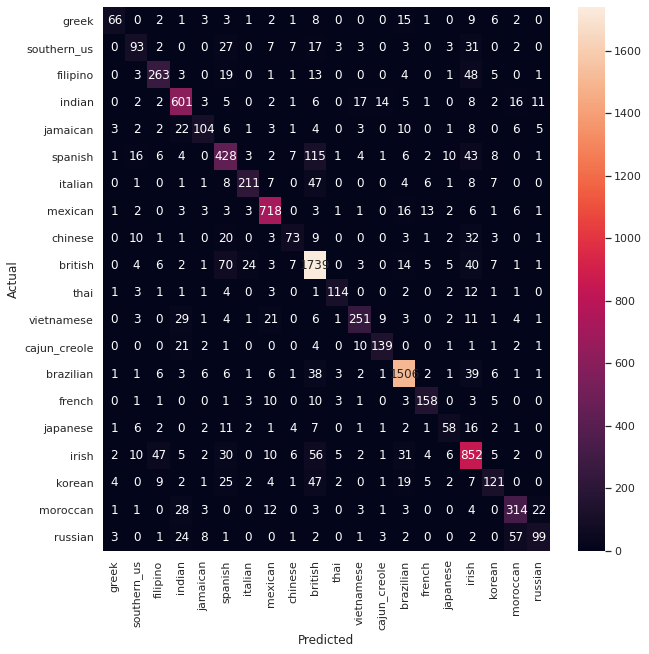

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=country.unique(), yticklabels=country.unique())

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Data Visualization for Output(LinearSVC Trial)

In [ ]:
output = pd.DataFrame({'id':test_df['id']})
output['cuisine'] = Y_PRED


In [ ]:
output

,id,cuisine
0,18009,british
1,28583,southern_us
2,41580,italian
3,29752,cajun_creole
4,35687,italian
...,...,...
9939,30246,french
9940,36028,southern_us
9941,22339,italian
9942,42525,southern_us


In [ ]:
output_country = output['cuisine']
output_country.value_counts()

italian         2087
mexican         1640
southern_us     1191
indian           816
chinese          721
french           673
thai             419
cajun_creole     377
japanese         297
greek            277
moroccan         191
korean           185
vietnamese       183
spanish          165
filipino         158
british          154
russian          112
irish            111
jamaican         100
brazilian         87
Name: cuisine, dtype: int64

In [ ]:
first_trial=pd.concat([test_df, output.drop("id",axis=1)], join = 'outer', axis = 1)
first_trial=first_trial.drop("id",axis=1)
first_trial

,ingredients,cuisine
0,baking egg all purpose flour raisin milk whit...,british
1,sugar egg yolk corn starch cream of tartar ban...,southern_us
2,sausage link fennel bulb frond olive oil cuban...,italian
3,meat cut file smoked sausage okra shrimp ando...,cajun_creole
4,black pepper salt sausage casing leek parmigi...,italian
...,...,...
9939,large egg yolk fresh lemon juice sugar bourbon...,french
9940,hot sauce butter sweet potato adobo sauce salt,southern_us
9941,black pepper salt parmigiano reggiano cheese r...,italian
9942,cheddar cheese cayenne paprika plum tomato gre...,southern_us


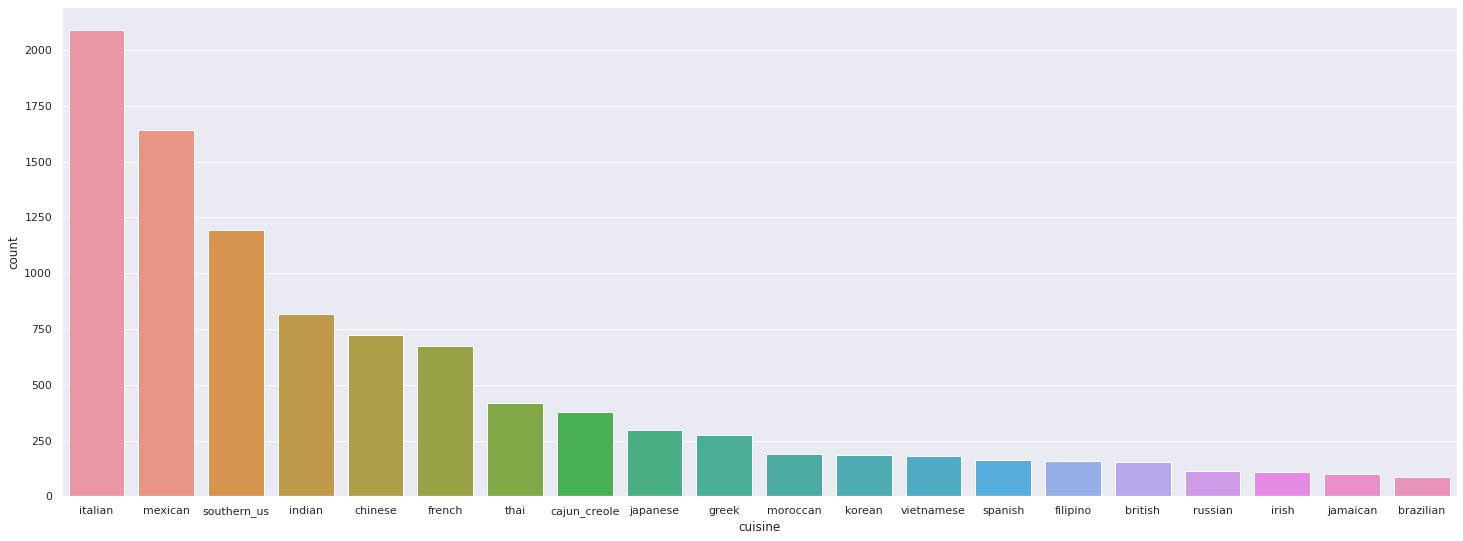

In [ ]:
a4_dims = (25, 9)
fig, ax = plt.subplots(figsize=a4_dims)

sb.countplot(ax=ax,x = 'cuisine',data = first_trial,order = first_trial["cuisine"].value_counts().index)
plt.show()

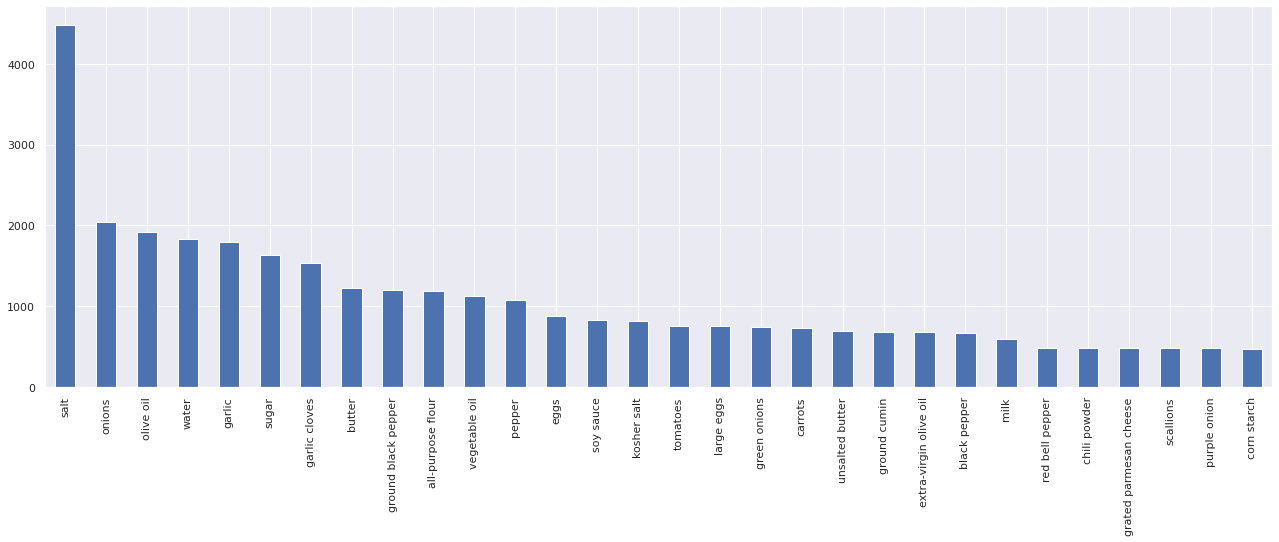

In [ ]:
fig, ax = plt.subplots(figsize=(22,7))
output_extensive_ing_list = []
for x in pd.read_json('/content/drive/MyDrive/Colab Notebooks/ADDDROPGANG/test.json')['ingredients']:
    for y in x:
        output_extensive_ing_list.append(y)
        
output_extensive_ing_list = pd.Series(output_extensive_ing_list)
output_extensive_ing_list.value_counts().sort_values(ascending=False).head(30).plot.bar(ax = ax)


plt.show()

#Further Improvement(Using LinearSVC, SVC, Gridsearch, Hyperparameter Tuning)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000, 10000],  
              'penalty': ['l1','l2'],
             'loss': ['hinge','squared hinge']} 

grid = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3, n_jobs=-1, scoring='f1_micro')

In [ ]:
grid.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  3.7min finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000, 10000],
                         'loss': ['hinge', 'squared hinge'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_micro', verbose=3)

In [ ]:
grid.best_params_

{'C': 1, 'loss': 'hinge', 'penalty': 'l2'}

In [ ]:
grid.best_score_

0.7782098558498156

In [ ]:
!pip install -q optuna

     |████████████████████████████████| 296kB 4.1MB/s 
     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 163kB 30.0MB/s 
     |████████████████████████████████| 143kB 32.8MB/s 
     |████████████████████████████████| 51kB 4.5MB/s 
     |████████████████████████████████| 112kB 30.5MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 


In [ ]:
import optuna

In [ ]:
def objective(trial):
  C = trial.suggest_float('C', 1e-3, 1e5, log=True)
  #penalty = trial.suggest_categorical('penalty', ['l1','l2'])
  loss = trial.suggest_categorical('loss', ['hinge','squared_hinge'])
  model = LinearSVC(loss = loss, C = C)
  model.fit(X_train_tfidf, y_train)
  return model.score(X_test_tfidf, y_test)

In [ ]:
linearsvc_trial = optuna.create_study(direction = "maximize")

[I 2021-04-16 08:18:16,579] A new study created in memory with name: no-name-7dc8e393-9ca8-44e5-b684-cfdfae59ce4f


In [ ]:
# MANUALLY STOP THIS LINE OF CODE AFTER IT HAS RAN "ENOUGH"
linearsvc_trial.optimize(objective, n_jobs = -1)

/usr/local/lib/python3.7/dist-packages/optuna/study.py:397: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

[I 2021-04-16 08:18:31,046] Trial 0 finished with value: 0.7846942880128721 and parameters: {'C': 8.323188142004943, 'loss': 'hinge'}. Best is trial 0 with value: 0.7846942880128721.
[I 2021-04-16 08:18:43,874] Trial 2 finished with value: 0.7759452936444087 and parameters: {'C': 33.44699296930159, 'loss': 'hinge'}. Best is trial 0 with value: 0.7846942880128721.
[I 2021-04-16 08:18:46,535] Trial 3 finished with value: 0.7436645213193885 and parameters: {'C': 0.06918821153393934, 'loss': 'hinge'}. Best is trial 0 with value: 0.7846942880128721.
[I 2021-04-16 08:18:59,400] Trial 1 finished with value: 0.76025744167337

KeyboardInterrupt: ignored

In [ ]:
linearsvc_trial.best_params

{'C': 0.41938456561841253, 'loss': 'squared_hinge'}

In [ ]:
linearsvc_trial.best_value

0.7954545454545454

In [ ]:
def new_objective(trial):
  C = trial.suggest_float('C', 1e-3, 1e5, log=True)
  gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
  #else:
    #gamma = 'scale'
  model = SVC(C = C, kernel = 'rbf', gamma = gamma)
  model.fit(X_train_tfidf, y_train)
  return model.score(X_test_tfidf, y_test)

In [ ]:
svc_trial = optuna.create_study(direction = "maximize")

[I 2021-04-16 08:23:17,607] A new study created in memory with name: no-name-204ca0b3-ffb2-4df8-83b5-be0cd6af38ca


In [ ]:
# CAN STOP THIS CODE AFTER IT HAS RAN LONG "ENOUGH" BUT THIS CODE WILL END EVENTUALLY, JUST TAKES A LONG TIME
svc_trial.optimize(new_objective, n_jobs = -1)

/usr/local/lib/python3.7/dist-packages/optuna/study.py:397: FutureWarning:

`n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.

[I 2021-04-16 08:31:38,045] Trial 1 finished with value: 0.5767296862429606 and parameters: {'C': 0.035487474857222284, 'gamma': 'scale'}. Best is trial 1 with value: 0.5767296862429606.
[I 2021-04-16 08:33:09,690] Trial 0 finished with value: 0.19428801287208367 and parameters: {'C': 0.8621002882290171, 'gamma': 'auto'}. Best is trial 1 with value: 0.5767296862429606.
[I 2021-04-16 08:36:57,139] Trial 3 finished with value: 0.7910297666934835 and parameters: {'C': 856.8686719276528, 'gamma': 'auto'}. Best is trial 3 with value: 0.7910297666934835.
[I 2021-04-16 08:37:25,373] Trial 2 finished with value: 0.8136564762670957 and parameters: {'C': 4268.479417633079, 'gamma': 'scale'}. Best is trial 2 with value: 0.8136564762670957.


KeyboardInterrupt: ignored

In [ ]:
svc_trial.best_params

{'C': 4268.479417633079, 'gamma': 'scale'}

In [ ]:
svc_trial.best_value

0.8136564762670957

In [ ]:
svc_df=pd.DataFrame()
svc_df["cuisine"]=grid.best_estimator_.predict(X_TEST_TFIDF)
svc_df.to_csv('svc_hyperparameter.csv', index=False)
svc_df

,cuisine
0,irish
1,southern_us
2,italian
3,cajun_creole
4,italian
...,...
9939,french
9940,southern_us
9941,italian
9942,southern_us


# Comparison between 79% and 81% training model and visualization for 81% Model

In [ ]:
comparison=pd.concat([svc_df,output.drop("id",axis=1)], join = 'outer', axis = 1)

In [ ]:
comparison.columns = ['Prediction_1', 'Prediction_2']

In [ ]:
comparison

,Prediction_1,Prediction_2
0,irish,british
1,southern_us,southern_us
2,italian,italian
3,cajun_creole,cajun_creole
4,italian,italian
...,...,...
9939,french,french
9940,southern_us,southern_us
9941,italian,italian
9942,southern_us,southern_us


In [ ]:
b = comparison.loc[comparison.Prediction_1 != comparison.Prediction_2]

In [ ]:
b

,Prediction_1,Prediction_2
0,irish,british
14,southern_us,british
16,mexican,southern_us
17,french,southern_us
32,japanese,mexican
...,...,...
9862,italian,french
9900,korean,thai
9909,mexican,french
9924,southern_us,italian


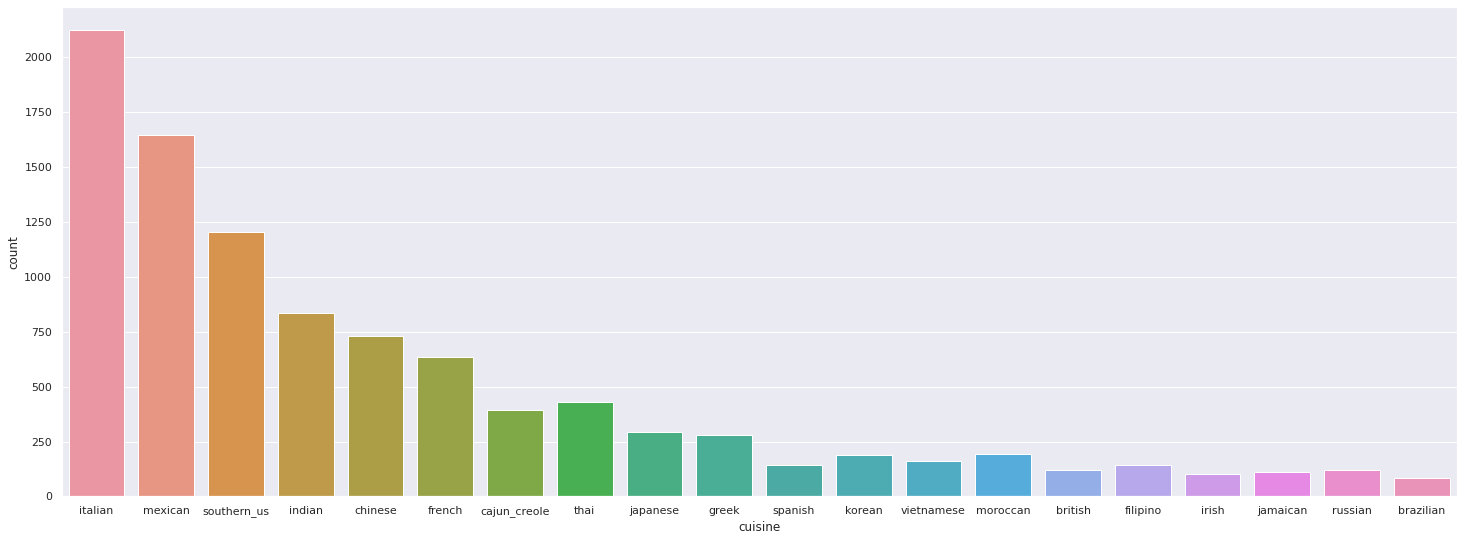

In [ ]:
a4_dims = (25, 9)
fig, ax = plt.subplots(figsize=a4_dims)

sb.countplot(ax=ax,x = 'cuisine',data = svc_df,order = country.value_counts().index)
plt.show()

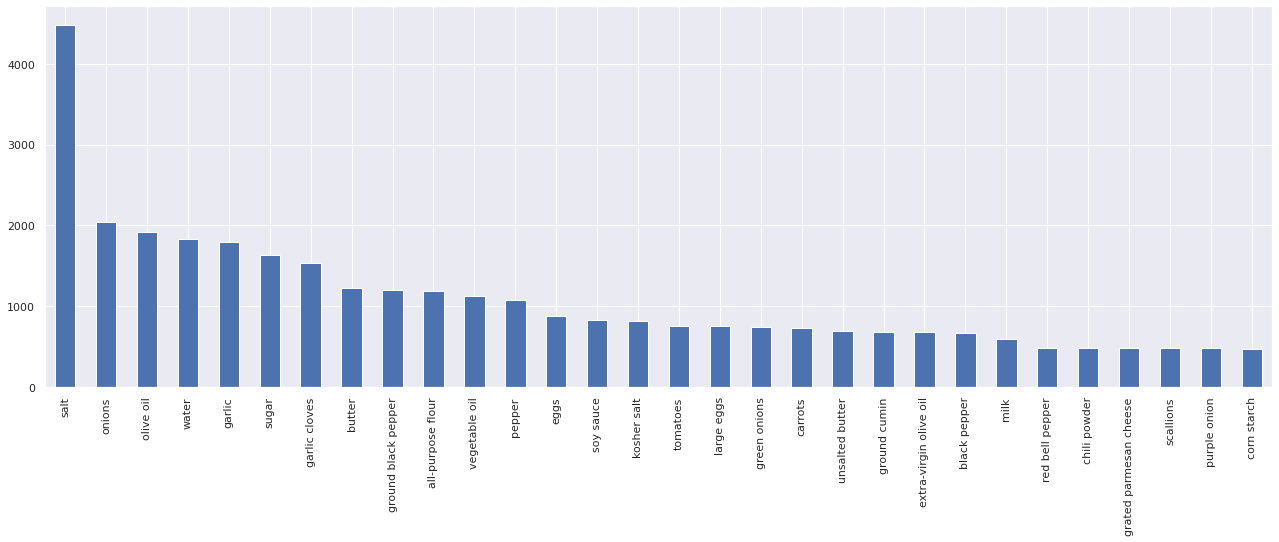

In [ ]:
fig, ax = plt.subplots(figsize=(22,7))
output_extensive_ing_list = []
for x in pd.read_json('/content/drive/MyDrive/Colab Notebooks/ADDDROPGANG/test.json')['ingredients']:
    for y in x:
        output_extensive_ing_list.append(y)
        
output_extensive_ing_list = pd.Series(output_extensive_ing_list)
output_extensive_ing_list.value_counts().sort_values(ascending=False).head(30).plot.bar(ax = ax)


plt.show()

In [ ]:
svc_df=pd.concat([svc_df,pd.read_json('/content/drive/MyDrive/Colab Notebooks/ADDDROPGANG/test.json')], axis = 1)

In [ ]:
svc_df

,cuisine,id,ingredients
0,irish,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,southern_us,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,italian,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,cajun_creole,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,italian,35687,"[ground black pepper, salt, sausage casings, l..."
...,...,...,...
9939,french,30246,"[large egg yolks, fresh lemon juice, sugar, bo..."
9940,southern_us,36028,"[hot sauce, butter, sweet potatoes, adobo sauc..."
9941,italian,22339,"[black pepper, salt, parmigiano reggiano chees..."
9942,southern_us,42525,"[cheddar cheese, cayenne, paprika, plum tomato..."
